# Group Project Data Analytics EarthQuakes United States of America ![America]
[America]: https://flagcdn.com/40x30/us.png

# 1 - Import Libraries and data

In [1]:
from datetime import datetime
import requests
import json
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('earthquakes usa.tsv',sep='\t')

In [3]:
data

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,"[""Year >= 1900"",""Country = USA""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1900.0,8.0,11.0,4.0,40.0,0.0,2812.0,NaN,ALASKA: SE. ALASKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1900.0,10.0,9.0,12.0,25.0,NaN,NaN,NaN,ALASKA: KODIAK ISLAND,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,1901.0,3.0,3.0,7.0,45.0,NaN,1277.0,NaN,CALIFORNIA: SAN DIEGO,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,1901.0,12.0,31.0,9.0,2.0,30.0,1286.0,NaN,ALASKA: ALEUTIAN ISLANDS: FOX ISLANDS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,NaN,2020.0,7.0,22.0,6.0,12.0,44.0,5753.0,NaN,ALASKA,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
198,NaN,2020.0,8.0,9.0,12.0,7.0,37.0,NaN,NaN,NORTH CAROLINA: SPARTA,...,NaN,NaN,NaN,NaN,NaN,2.0,60.0,2.0,465.0,3.0
199,NaN,2020.0,10.0,19.0,20.0,54.0,39.0,5755.0,NaN,ALASKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,2021.0,7.0,29.0,6.0,15.0,47.0,5799.0,NaN,ALASKA PENINSULA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2 - Extract all the pieces information that are needed and Transform the dataset

In [4]:
data = data.drop(['Search Parameters', 'Sec'], axis=1) # We drop the Search Parameters and sec (seconds) columns that we will not use in our data set

In [5]:
data = data.drop(0,axis=0)   # Drop of the first row (full nan)

In [6]:
data.loc[:, ['Hr', 'Mn']] = data.loc[:, ['Hr', 'Mn']].fillna(0) # Fill with 0 nan on Hr and Mn

In [7]:
data.head()

,Year,Mo,Dy,Hr,Mn,Tsu,Vol,Location Name,Latitude,Longitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,1900.0,8.0,11.0,4.0,40.0,2812.0,NaN,ALASKA: SE. ALASKA,58.60,-137.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900.0,10.0,9.0,12.0,25.0,NaN,NaN,ALASKA: KODIAK ISLAND,57.09,-153.48,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,1901.0,3.0,3.0,7.0,45.0,1277.0,NaN,CALIFORNIA: SAN DIEGO,36.00,-120.50,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,1901.0,12.0,31.0,9.0,2.0,1286.0,NaN,ALASKA: ALEUTIAN ISLANDS: FOX ISLANDS,51.45,-171.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1902.0,1.0,1.0,5.0,20.0,NaN,NaN,ALASKA: ALEUTIAN ISLANDS: FOX ISLANDS,52.40,-167.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 1 to 201
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                201 non-null    float64
 1   Mo                                  201 non-null    float64
 2   Dy                                  201 non-null    float64
 3   Hr                                  201 non-null    float64
 4   Mn                                  201 non-null    float64
 5   Tsu                                 70 non-null     float64
 6   Vol                                 4 non-null      float64
 7   Location Name                       201 non-null    object 
 8   Latitude                            200 non-null    float64
 9   Longitude                           200 non-null    float64
 10  Focal Depth (km)                    159 non-null    float64
 11  Mag                                 188 non-n

We combine the Year, Mo, Dy, Hr and Mn columns to a general datetime

In [9]:
# Function to create datetime objects
def create_datetime(row):
    if pd.isnull(row['Year']) or pd.isnull(row['Mo']) or pd.isnull(row['Dy']):
        return pd.NaT
    return datetime(int(row['Year']), int(row['Mo']), int(row['Dy']), int(row['Hr']), int(row['Mn']))

# Create column of combined date and time
data['Datetime'] = data.apply(create_datetime, axis=1)

In [10]:
# Dropped Year Mo Dy Hr and Mn columns to keep only datetime in replacement.
data.drop(['Year', 'Mo', 'Dy', 'Hr', 'Mn'], axis=1, inplace=True)

In [11]:
data

,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,...,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Datetime
1,2812.0,NaN,ALASKA: SE. ALASKA,58.600,-137.500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-08-11 04:40:00
2,NaN,NaN,ALASKA: KODIAK ISLAND,57.090,-153.480,NaN,8.3,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1900-10-09 12:25:00
3,1277.0,NaN,CALIFORNIA: SAN DIEGO,36.000,-120.500,NaN,6.4,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1901-03-03 07:45:00
4,1286.0,NaN,ALASKA: ALEUTIAN ISLANDS: FOX ISLANDS,51.450,-171.020,NaN,7.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-12-31 09:02:00
5,NaN,NaN,ALASKA: ALEUTIAN ISLANDS: FOX ISLANDS,52.400,-167.500,NaN,7.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,5753.0,NaN,ALASKA,55.030,-158.522,28.0,7.8,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-07-22 06:12:00
198,NaN,NaN,NORTH CAROLINA: SPARTA,36.476,-81.094,8.0,5.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,60.0,2.0,465.0,3.0,2020-08-09 12:07:00
199,5755.0,NaN,ALASKA,54.608,-159.655,33.0,7.6,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-19 20:54:00
200,5799.0,NaN,ALASKA PENINSULA,55.325,-157.841,32.0,8.2,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-29 06:15:00


We have few missing values ​​in the Magnitude column, so these rows will be left out of our data set.

In [12]:
data = data.dropna(subset=['Mag'])
data

,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,...,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Datetime
2,NaN,NaN,ALASKA: KODIAK ISLAND,57.090,-153.480,NaN,8.3,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1900-10-09 12:25:00
3,1277.0,NaN,CALIFORNIA: SAN DIEGO,36.000,-120.500,NaN,6.4,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1901-03-03 07:45:00
4,1286.0,NaN,ALASKA: ALEUTIAN ISLANDS: FOX ISLANDS,51.450,-171.020,NaN,7.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901-12-31 09:02:00
5,NaN,NaN,ALASKA: ALEUTIAN ISLANDS: FOX ISLANDS,52.400,-167.500,NaN,7.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902-01-01 05:20:00
8,NaN,NaN,ALASKA: SOUTHWEST,61.560,-158.540,NaN,8.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903-06-02 13:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,5753.0,NaN,ALASKA,55.030,-158.522,28.0,7.8,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-07-22 06:12:00
198,NaN,NaN,NORTH CAROLINA: SPARTA,36.476,-81.094,8.0,5.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,60.0,2.0,465.0,3.0,2020-08-09 12:07:00
199,5755.0,NaN,ALASKA,54.608,-159.655,33.0,7.6,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-19 20:54:00
200,5799.0,NaN,ALASKA PENINSULA,55.325,-157.841,32.0,8.2,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-29 06:15:00


In [13]:
# Replace null values ​​in 'Tsu' and 'Vol' (Tsunami and Volcano) and assign  true or false
data.loc[:,'Tsu'] = data['Tsu'].notnull()
data.loc[:,'Vol'] = data['Vol'].notnull()

Assigning the columns to a neater place

In [14]:
columns = data.columns.tolist()
column_to_move = columns.pop(columns.index('Datetime'))
columns.insert(0, column_to_move)
data = data[columns]

In [15]:
columns = data.columns.tolist()
column_to_move = columns.pop(columns.index('Location Name'))
columns.insert(1, column_to_move)
data = data[columns]

In [16]:
data.reset_index(drop=True, inplace=True)

In [17]:
data

,Datetime,Location Name,Tsu,Vol,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,1900-10-09 12:25:00,ALASKA: KODIAK ISLAND,False,False,57.090,-153.480,NaN,8.3,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,1901-03-03 07:45:00,CALIFORNIA: SAN DIEGO,True,False,36.000,-120.500,NaN,6.4,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1901-12-31 09:02:00,ALASKA: ALEUTIAN ISLANDS: FOX ISLANDS,True,False,51.450,-171.020,NaN,7.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1902-01-01 05:20:00,ALASKA: ALEUTIAN ISLANDS: FOX ISLANDS,False,False,52.400,-167.500,NaN,7.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1903-06-02 13:17:00,ALASKA: SOUTHWEST,False,False,61.560,-158.540,NaN,8.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-22 06:12:00,ALASKA,True,False,55.030,-158.522,28.0,7.8,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
184,2020-08-09 12:07:00,NORTH CAROLINA: SPARTA,False,False,36.476,-81.094,8.0,5.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,60.0,2.0,465.0,3.0
185,2020-10-19 20:54:00,ALASKA,True,False,54.608,-159.655,33.0,7.6,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,2021-07-29 06:15:00,ALASKA PENINSULA,True,False,55.325,-157.841,32.0,8.2,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Number of times')

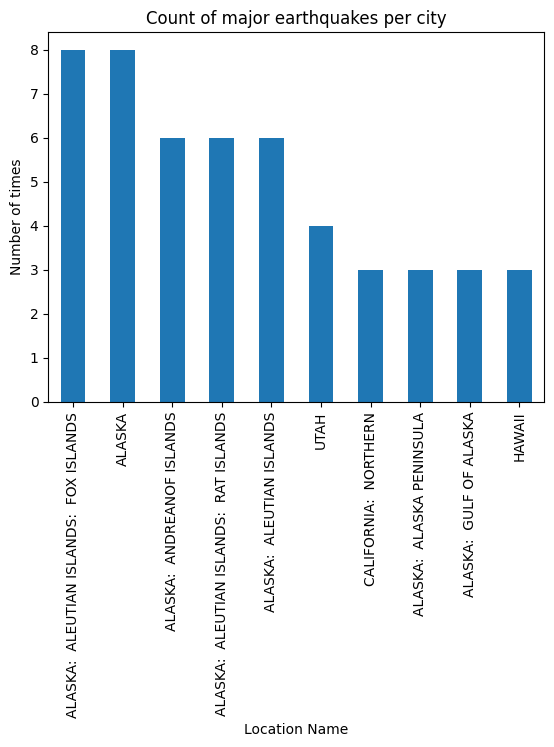

In [18]:
# Largest number of major earthquakes per city in the last 120 years

ax= data['Location Name'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='Count of major earthquakes per city')

ax.set_xlabel('Location Name')
ax.set_ylabel('Number of times')

# 3 - Import the dataframe into .csv file

In [19]:
data.to_csv(r'data usa for analysis.csv',index=False, header=True)